# importing libraries and understanding data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Transformed Data Set - Sheet1.csv")
data.head(5)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [3]:
data.isnull().sum()#check total null values in data

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [4]:
data.describe()#get basic info of data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


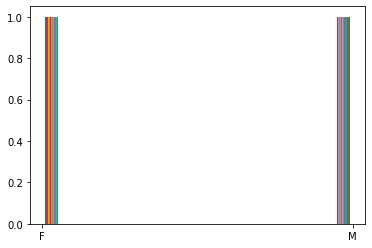

In [5]:
plt.hist(data["Gender"])
plt.show()

# Data Visualization

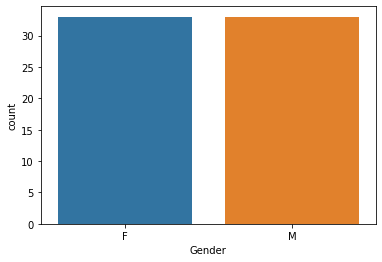

In [6]:
import seaborn as sns
sns.countplot(data["Gender"])

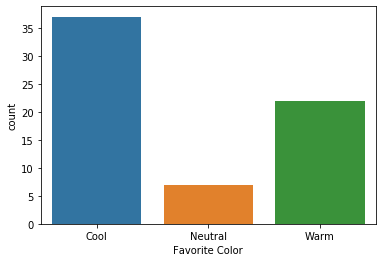

In [7]:
sns.countplot(data["Favorite Color"])

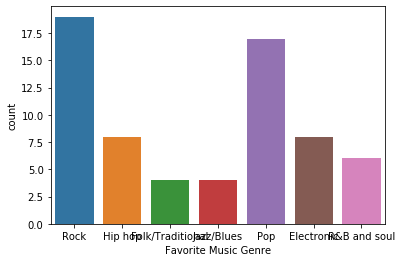

In [8]:
sns.countplot(data["Favorite Music Genre"])

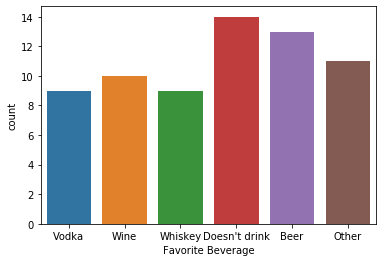

In [9]:
sns.countplot(data["Favorite Beverage"])

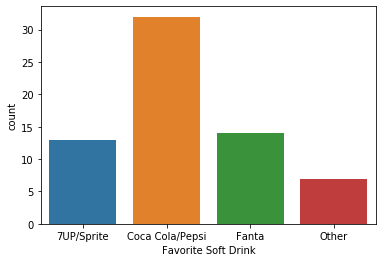

In [10]:
sns.countplot(data["Favorite Soft Drink"])

# categorical variable conversion

In [14]:
def cat(dataset):
    dataset_x = dataset.iloc[:, 0:4]
    dataset_x=pd.get_dummies(dataset_x)
    return dataset_x
data_x=cat(data)
data_x

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
5,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


# Test Train split

In [18]:
dataset_y = data.iloc[:, 4]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data_x, dataset_y, test_size=0.2, 
                                                    random_state=1) 

# Modelling with train data using knn

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Evalution of knn by confusion matrix

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
pre=classifier.predict(X_test)
print(confusion_matrix(y_test, pre))
#print(f1_score(y_test,pre))
pre=classifier.predict(X_train)
print(confusion_matrix(y_train, pre))
#print(f1_score(y_train,pre))


[[3 0]
 [7 4]]
[[24  6]
 [ 9 13]]


# Modeling with ranom forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=750,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=20, random_state=0)

clf.fit(X_train,y_train)

C:\Users\M.Hasnain Baloch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Evalution of random forest

In [33]:
pre=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(confusion_matrix(y_test, pre))
print(confusion_matrix(y_train,clf.predict(X_train)))

[[2 1]
 [7 4]]
[[30  0]
 [ 2 20]]
